# Music Genre Classification- Spotify Factors for Popularity

We plan on using our data set to determine what traits make a song popular in regards to loudness(dB), energy levels, and beats per minute. We will also use this to determine if there is a common relationship between genres. We will do that by making several different plots and types of plots to show the correlations over the time frame of 2010-2019.


Which factor affects popularity the most?

    -Song popularity vs. dB
    -Song popularity vs. energy levels
    -Song popularity vs. danceability 
    -Song popularity vs. likelihood the song is live or not
    -Song popularity vs. BPM


- prediction model

- gven data about the song, figure out what genre it could best belong to

# Goal
- Create a Machine Learning Model to predict genres based off of the attributes bpm, energy levels, dB (loudness), and duration

# Steps 
- classify genre based off attributes 
- turn all "___ pop" genres into "pop" and all the other genres


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [2]:
data = pd.read_csv("top10s.csv")

data

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [23]:
#drop unnamed column

data.drop(["Unnamed: 0", "dnce", "live", "val", "acous", "spch", "year"], axis = 1)


,title,artist,top genre,bpm,nrgy,dB,dur,pop
0,"Hey, Soul Sister",Train,neo mellow,97,89,-4,217,83
1,Love The Way You Lie,Eminem,detroit hip hop,87,93,-5,263,82
2,TiK ToK,Kesha,dance pop,120,84,-3,200,80
3,Bad Romance,Lady Gaga,dance pop,119,92,-4,295,79
4,Just the Way You Are,Bruno Mars,pop,109,84,-5,221,78
...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,104,66,-7,176,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,-6,206,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,136,76,-5,260,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,114,79,-6,217,69


In [33]:
genre = np.array(data["top genre"])
genre1 = np.unique(genre)
genre1

#pop, r&b, rap, rock, edm, other

array(['acoustic pop', 'alaska indie', 'alternative r&b', 'art pop',
       'atl hip hop', 'australian dance', 'australian hip hop',
       'australian pop', 'barbadian pop', 'baroque pop', 'belgian edm',
       'big room', 'boy band', 'british soul', 'brostep',
       'canadian contemporary r&b', 'canadian hip hop', 'canadian latin',
       'canadian pop', 'candy pop', 'celtic rock', 'chicago rap',
       'colombian pop', 'complextro', 'contemporary country', 'dance pop',
       'danish pop', 'detroit hip hop', 'downtempo', 'edm', 'electro',
       'electro house', 'electronic trap', 'electropop', 'escape room',
       'folk-pop', 'french indie pop', 'hip hop', 'hip pop', 'hollywood',
       'house', 'indie pop', 'irish singer-songwriter', 'latin',
       'metropopolis', 'moroccan pop', 'neo mellow', 'permanent wave',
       'pop', 'tropical house'], dtype=object)

 All of the variables and what they mean: 
 
    - title = title of the song
    - artist = song's artist
    - top genre = genre of the track
    - year = song's year in the Billboard
    - bpm = beats per minute or the tempo of the song
    - nrgy = energy or the energy of a song, calculated through a higher the value, the more energetic the song is
    - dnce = dancability meaning the higher the value the easier it is to dance to 
    - dB = loudness, the higher the value the louder it is 
    - live = liveliness, the higher the value the more likely the song is a live recording
    - val = calence, the higher it is, the more positive mood for the song
    - dur = the length of the song
    - acous = the more accoustic the song is
    - spch = the more spoken word the song contains
    - pop = the higher, the more popular the song is

# BPM vs Popularity

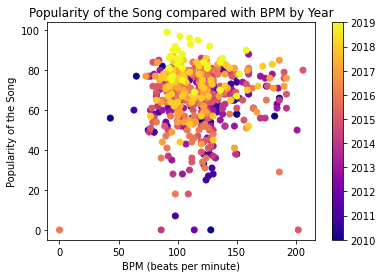

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(data["bpm"], data["pop"], c=data["year"], cmap="plasma")

plt.colorbar()

plt.xlabel("BPM (beats per minute)")
plt.ylabel("Popularity of the Song")
plt.title("Popularity of the Song compared with BPM by Year")

plt.show()

# Energy vs Popularity

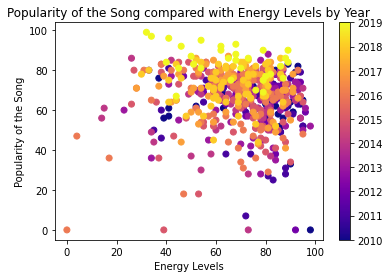

In [5]:
plt.scatter(data["nrgy"], data["pop"], c=data["year"], cmap="plasma")

plt.colorbar()

plt.xlabel("Energy Levels")
plt.ylabel("Popularity of the Song")
plt.title("Popularity of the Song compared with Energy Levels by Year")


plt.show()

No handles with labels found to put in legend.


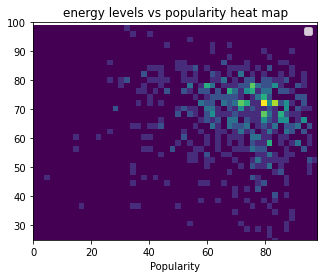

In [6]:
heatmap, xedges, yedges = np.histogram2d(data["nrgy"], data["pop"], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')

plt.ylim(25,100)

plt.xlabel("Energy levels")
plt.xlabel("Popularity")
plt.title("energy levels vs popularity heat map")
plt.legend()
plt.show()


# Dancability vs Popularity

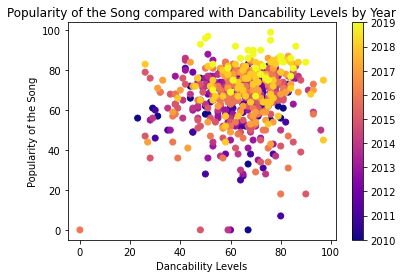

In [7]:
plt.scatter(data["dnce"], data["pop"], c=data["year"], cmap="plasma")

plt.colorbar()

plt.xlabel("Dancability Levels")
plt.ylabel("Popularity of the Song")
plt.title("Popularity of the Song compared with Dancability Levels by Year")


plt.show()

# Loudness (dB) vs Popularity with Linear Regression

Data was fit using OLS fit

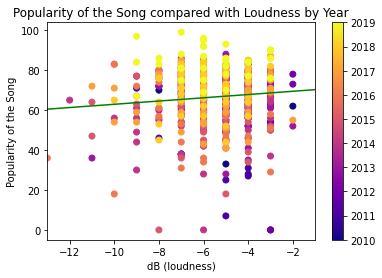

In [8]:
plt.scatter(data["dB"], data["pop"], c=data["year"], cmap="plasma")

plt.colorbar()

plt.xlabel("dB (loudness)")
plt.ylabel("Popularity of the Song")
plt.xlim(-13,-1)
plt.title("Popularity of the Song compared with Loudness by Year")

X = data[["dB"]]
y = data["pop"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

x_min = -13
x_max = -1
y_min = model.predict([1, x_min])
y_max = model.predict([1, x_max])
plt.plot([x_min, x_max], [y_min, y_max], color="green")

plt.show()

# Masking for only 2019 songs

In [9]:
mask = (data["year"] == 2019)

In [10]:
data_2019 = data[mask]
data_2019

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
573,574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
574,575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
575,576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
576,577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93
577,578,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
578,579,Trampoline (with ZAYN),SHAED,electropop,2019,127,46,62,-6,14,50,184,56,3,92
579,580,Happier,Marshmello,brostep,2019,100,79,69,-3,17,67,214,19,5,90
580,581,Truth Hurts,Lizzo,escape room,2019,158,62,72,-3,12,41,173,11,11,90
581,582,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90


In [11]:
import statsmodels.api as sm

pop_data = data[data["top genre"] == "pop"]
nonpop_data = data[data["top genre"] != "pop"]

pop_model = sm.OLS(pop_data["pop"], sm.add_constant(pop_data[["bpm", "nrgy"]])).fit()
nonpop_model = sm.OLS(nonpop_data["pop"], sm.add_constant(nonpop_data[["bpm", "nrgy"]])).fit()

# print("Pop genre model:")
# print(pop_model.summary())
print("\nNon-pop genre model:")
print(nonpop_model.summary())


Non-pop genre model:
                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8955
Date:                Wed, 05 Apr 2023   Prob (F-statistic):              0.409
Time:                        15:18:44   Log-Likelihood:                -2224.9
No. Observations:                 543   AIC:                             4456.
Df Residuals:                     540   BIC:                             4469.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2731      3.8

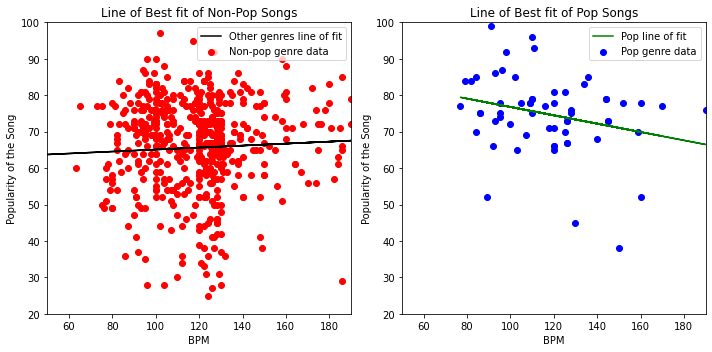

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# subplot for non-pop genre data
a, b = np.polyfit(nonpop_data["bpm"], nonpop_data["pop"], 1)
ax1.scatter(nonpop_data["bpm"], nonpop_data["pop"], color='red', label = "Non-pop genre data")
ax1.plot(nonpop_data["bpm"], a*nonpop_data['bpm']+b, color = "black", label = "Other genres line of fit")
ax1.set_xlim(50,190)
ax1.set_ylim(20,100)
ax1.set_xlabel('BPM')
ax1.set_ylabel('Popularity of the Song')
ax1.legend()
ax1.set_title("Line of Best fit of Non-Pop Songs")

# subplot for pop genre data
c, d = np.polyfit(pop_data["bpm"], pop_data["pop"], 1)
ax2.scatter(pop_data["bpm"], pop_data["pop"], color='blue', label = "Pop genre data")
ax2.plot(pop_data["bpm"], c*pop_data['bpm']+d, color = "green", label = "Pop line of fit")
ax2.set_xlim(50,190)
ax2.set_ylim(20,100)
ax2.set_xlabel('BPM')
ax2.set_ylabel('Popularity of the Song')
ax2.legend()
ax2.set_title("Line of Best fit of Pop Songs")

plt.tight_layout()
plt.show()

# CLF

In [37]:
# Step 1: Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Prepare the dataset
# Replace this with your actual data
X = np.array(data["bpm", "dB"])
y = np.array(data["top genre"])

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a machine learning algorithm and create a model
knn = KNeighborsClassifier(n_neighbors=3)

# Step 5: Train the model
knn.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Make predictions
song_features = np.array([[5, 6, 7]])
predicted_genre = knn.predict(song_features)
print("Predicted genre:", predicted_genre)


KeyError: ('bpm', 'dB')

In [13]:
#data2 = np.arange(603).reshape((-1,1))


In [19]:
train_vectors, test_vectors,train_labels, test_labels = train_test_split(data["pop"], data["bpm"], test_size=0.25, random_state=420)


In [20]:
start = time.time()

tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4],
               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
               'kernel': ['linear','rbf']}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)


clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sk

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fil

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[83. 72. 72. 70. 41. 53. 71. 70. 77. 59. 77. 84. 59. 73. 61. 59. 60. 45.
 35. 30. 81. 60. 70. 65. 86. 49. 28. 62. 68. 52. 74. 56. 68. 58. 72. 59.
 72. 63. 72. 69. 86. 56. 72. 53. 46. 67. 84. 80. 73. 60. 45. 57. 41. 69.
 65. 47. 85. 79. 66. 62. 85. 83. 58. 57. 82. 38. 90. 73. 76. 66. 86. 65.
 74. 78. 73. 46. 44. 78. 84. 64. 76. 69. 57. 68. 75. 36. 56. 65. 67. 76.
 66. 63. 76. 70. 54. 52. 61. 75. 64. 79. 76. 61. 71. 78. 76. 67. 72. 79.
 61. 54. 72.  0. 64. 71. 60. 74. 70. 57. 75. 78. 57. 65. 71. 67. 72. 80.
 69. 76. 81. 97. 70. 92. 76. 78. 68. 83. 52. 80. 76. 99. 84. 52. 78. 57.
 76. 38. 70. 69. 65. 43. 81. 76. 46. 81. 62. 66. 85. 74. 73. 69. 70. 42.
 69. 54. 77. 68. 84. 77. 58. 82. 70. 65. 71. 50. 72. 77. 83. 65. 72. 66.
 60. 79. 18. 65. 52. 80. 68. 72. 52. 76. 38. 78. 86. 64. 79. 88. 62. 41.
 67. 78. 79. 74. 68. 64. 71. 62. 67. 57. 61. 61. 58. 69. 83. 80. 64. 72.
 78. 51. 80. 73. 82. 76. 79. 69. 77. 56. 59. 44. 80. 92. 59. 73. 77. 63.
 78. 78. 71. 50. 73. 39. 41. 68. 65. 50. 81. 65. 75. 67. 69. 61. 62. 67.
 65. 70. 58. 59. 68. 66. 45. 59. 62. 80. 61. 67. 77. 77. 86. 76. 78. 44.
 68. 62. 72. 72. 72. 65. 67. 55. 72. 88. 51. 75. 70. 65. 59. 72. 72.  0.
 75. 68. 81. 34. 71. 80. 36. 61. 52. 78. 71. 36. 66. 64. 79. 50. 52. 65.
 34. 31. 82. 56. 65. 49. 74. 67. 57. 71. 72. 65. 77. 84. 31. 78. 84. 63.
 76. 71. 72. 67. 68. 72. 67. 55. 76. 78. 65. 80. 78. 71. 77. 81. 68. 73.
 45. 28. 72. 69. 25. 84. 78. 80.  0. 72. 70. 63. 66. 84. 29. 69. 64. 69.
 73. 84. 80. 78. 73. 58. 75. 73. 75. 77. 73. 76. 65. 72. 73. 66. 74. 64.
 83. 59. 73. 73. 69. 96. 44. 66. 85. 76. 71. 79. 50. 68. 76. 57. 73. 64.
 70. 57. 93. 53. 62. 64. 79. 67. 54. 18. 79. 66. 78. 81. 71. 73. 54. 38.
 80. 80. 52.  7. 73. 69. 54. 90. 78. 54. 47. 81. 76. 63. 76. 69. 62. 83.
 75. 78. 74. 72. 79. 72. 67. 65. 52. 70. 82. 61. 75. 70. 28. 75. 60. 95.
 73. 69.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

error states "Expected 2D array, got 1D array"

In [16]:
predict_vectors = test_vectors
true_labels = test_labels

print("Predicting names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(n_classes)))


# Making a Class to add in personal favorite song

In [17]:
class FavSong:

    def __init__(self, year):
    
        self.year = year

    def set_name(self):
        self.name = name
        
    def set_year(self):
        self.year = year
        
    def get_name(self):
        return self.name


In [18]:
# temp = FavSong(2019)
# temp.set_name("julia")
# temp.get_name()